# State of the Union

## Word Usage with *tm*

### Created by Lars Bernhardsson

I used the jupyter/datascience-notebook docker image found at https://hub.docker.com/r/jupyter/datascience-notebook when making this notebook.

## R session prep

In [1]:
library(tm)

options(repr.matrix.max.rows = 10000, repr.matrix.max.cols = 10000)

Loading required package: NLP



## Data

In [2]:
if(file.exists("SOTUtexts.RData")) {
    load("SOTUtexts.RData")
} else {
    stop("Run the data notebook first")
}

## Processing

In [3]:
docs_df <- data.frame(doc_id=d$Speech, text=d$Text, d[, c("President", "Term", "Year")])

In [4]:
docs_ds <- DataframeSource(docs_df)

In [5]:
docs_c <- SimpleCorpus(docs_ds)
docs_c

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 3
Content:  documents: 44

In [6]:
getTransformations()

[1] "removeNumbers"     "removePunctuation" "removeWords"      
[4] "stemDocument"      "stripWhitespace"

In [7]:
docs_c <- tm_map(docs_c, removeNumbers)
docs_c <- tm_map(docs_c, removePunctuation)
docs_c <- tm_map(docs_c, stripWhitespace)
docs_c <- tm_map(docs_c, content_transformer(tolower))
docs_c <- tm_map(docs_c, removeWords, c(stopwords(), "applause"))
docs_c

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 3
Content:  documents: 44

In [8]:
docs_dtm <- DocumentTermMatrix(docs_c, control=list(weighting=weightTfIdf))

inspect(docs_dtm)

Warning message in TermDocumentMatrix.SimpleCorpus(x, control):
“custom functions are ignored”


<<DocumentTermMatrix (documents: 44, terms: 12109)>>
Non-/sparse entries: 60710/472086
Sparsity           : 89%
Maximal term length: 34
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
             Terms
Docs              audience       folks    hussein         iraq       iraqi
  1981 Reagan 0.0000000000 0.000000000 0.00000000 0.0000000000 0.000000000
  1987 Reagan 0.0000000000 0.000000000 0.00000000 0.0000000000 0.000000000
  2003 GWBush 0.0000000000 0.000000000 0.02059868 0.0034554250 0.004837595
  2007 GWBush 0.0000000000 0.000000000 0.00000000 0.0055134390 0.006891799
  2017 Trump  0.0016029273 0.000000000 0.00000000 0.0000000000 0.000000000
  2018 Trump  0.0006881853 0.000000000 0.00000000 0.0003219575 0.000000000
  2019 Trump  0.0048391089 0.000000000 0.00000000 0.0006468305 0.000000000
  2020 Trump  0.0036383039 0.000000000 0.00000000 0.0011347518 0.000000000
  2022 Biden  0.0045243489 0.004839965 0.00000000 0.0011759172

In [9]:
docs_tdm <- TermDocumentMatrix(docs_c, control=list(weighting=weightTfIdf))

inspect(docs_tdm)

Warning message in TermDocumentMatrix.SimpleCorpus(docs_c, control = list(weighting = weightTfIdf)):
“custom functions are ignored”


<<TermDocumentMatrix (terms: 12109, documents: 44)>>
Non-/sparse entries: 60710/472086
Sparsity           : 89%
Maximal term length: 34
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
          Docs
Terms       1981 Reagan  1987 Reagan  2003 GWBush  2007 GWBush   2017 Trump
  audience 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0016029273
  folks    0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  hussein  0.0000000000 0.0000000000 0.0205986755 0.0000000000 0.0000000000
  iraq     0.0000000000 0.0000000000 0.0034554250 0.0055134390 0.0000000000
  iraqi    0.0000000000 0.0000000000 0.0048375950 0.0068917988 0.0000000000
  must     0.0006097967 0.0006279175 0.0006336673 0.0006319204 0.0007640016
  saddam   0.0000000000 0.0000000000 0.0188717738 0.0000000000 0.0000000000
  soviet   0.0005865621 0.0070465782 0.0004740735 0.0000000000 0.0000000000
  terror   0.0000000000 0.0000000000 0.0023583349 0.00195

In [10]:
# Find the terms with the highest tf-idf, that is most unique to their speech.

findFreqTerms(docs_tdm, lowfreq = 0.02)

[1] "companies"   "industry"    "inflation"   "must"        "oil"        
 [6] "propose"     "recovery"    "reduction"   "soviet"      "space"      
[11] "thats"       "welfare"     "afghanistan" "lets"        "regime"     
[16] "college"     "usa"         "revolution"  "terrorists"  "drugs"      
[21] "terror"      "kids"        "terrorist"   "border"      "hussein"    
[26] "iraq"        "saddam"      "iraqi"       "folks"       "gun"        
[31] "audience"    "qaida"       "iraqis"

## Visualizations

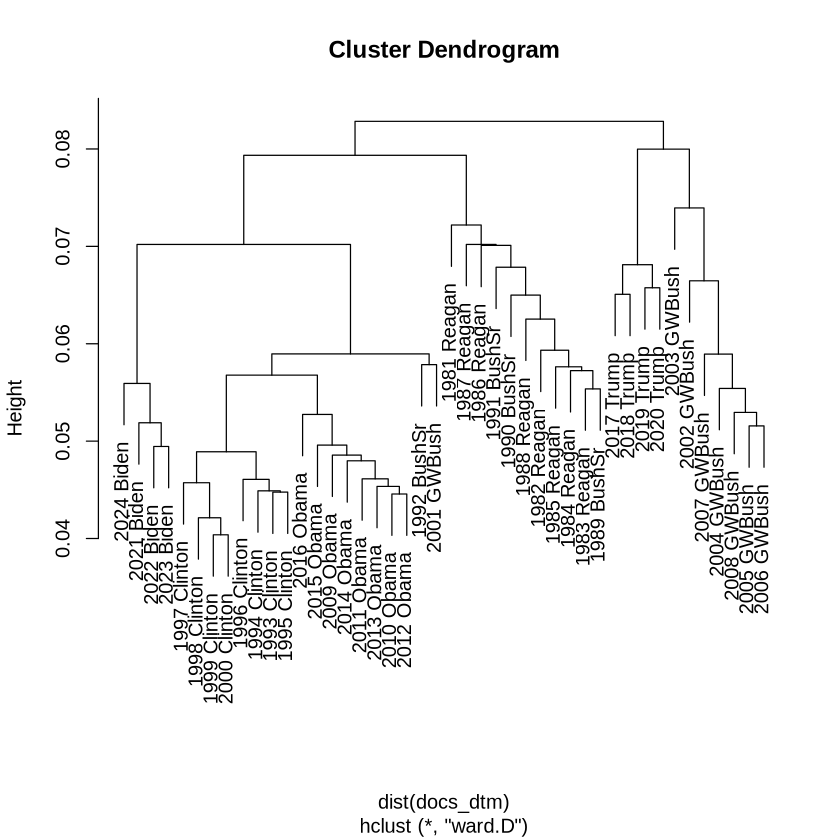

In [11]:
plot(hclust(dist(docs_dtm), method = "ward.D"))